In [29]:
import os
from iqm.qiskit_iqm import IQMProvider
from iqm.qiskit_iqm.fake_backends import IQMFakeAdonis
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

In [30]:
# Set up the Helmi backend
backend = IQMFakeAdonis()
HELMI_CORTEX_URL = os.getenv('HELMI_CORTEX_URL')
if not HELMI_CORTEX_URL:
    print('Environment variable HELMI_CORTEX_URL is not set. Are you running on Lumi and on the q_fiqci node?. Falling back to fake backend.')
	#raise ValueError("Environment variable HELMI_CORTEX_URL is not set")

else:
    provider = IQMProvider(HELMI_CORTEX_URL)
    backend = provider.get_backend()

Environment variable HELMI_CORTEX_URL is not set. Are you running on Lumi and on the q_fiqci node?. Falling back to fake backend.


In [31]:
# Create a bell state: 
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all() #expected equal majority counts of '00' and '11'

qc.draw()

┌───┐      ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

In [32]:
transpiled_circuit = transpile(qc, backend, layout_method='sabre', optimization_level=3)
transpiled_circuit.draw()

global phase: 3π/2
               ┌────────────┐┌────────┐                            ░ ┌─┐   
      q_0 -> 0 ┤ R(π/2,π/2) ├┤ R(π,0) ├─■──────────────────────────░─┤M├───
               └────────────┘└────────┘ │                          ░ └╥┘   
ancilla_0 -> 1 ─────────────────────────┼─────────────────────────────╫────
               ┌────────────┐┌────────┐ │ ┌────────────┐┌────────┐ ░  ║ ┌─┐
      q_1 -> 2 ┤ R(π/2,π/2) ├┤ R(π,0) ├─■─┤ R(π/2,π/2) ├┤ R(π,0) ├─░──╫─┤M├
               └────────────┘└────────┘   └────────────┘└────────┘ ░  ║ └╥┘
ancilla_1 -> 3 ───────────────────────────────────────────────────────╫──╫─
                                                                      ║  ║ 
ancilla_2 -> 4 ───────────────────────────────────────────────────────╫──╫─
                                                                      ║  ║ 
       meas: 2/═══════════════════════════════════════════════════════╩══╩═
                                                                      0  1

In [33]:
job = backend.run(transpiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()


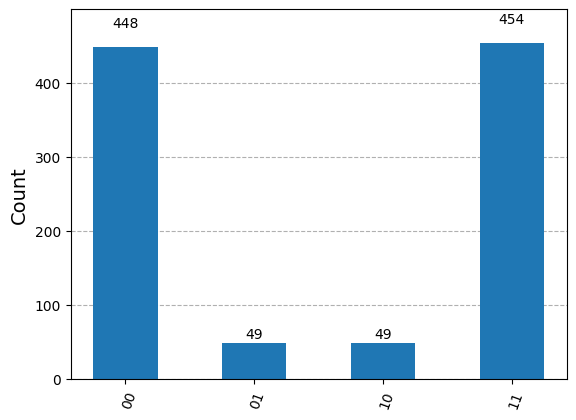

In [35]:
plot_histogram(counts)